In [1]:
import numpy as np
import pandas as pd
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from scipy.stats import skew
from scipy.stats.stats import pearsonr
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt

%config InlineBackend.figure_format = 'retina' 
%matplotlib inline

In [2]:
# read in the Boston Housing data set

boston = pd.read_csv("boston.csv")
boston.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT,MV
0,0.00632,18.0,2.31,0,0.538,6.575,65.199997,4.0900,1,296,15.300000,396.899994,4.98,24.000000
1,0.02731,0.0,7.07,0,0.469,6.421,78.900002,4.9671,2,242,17.799999,396.899994,9.14,21.600000
2,0.02729,0.0,7.07,0,0.469,7.185,61.099998,4.9671,2,242,17.799999,392.829987,4.03,34.700001
3,0.03237,0.0,2.18,0,0.458,6.998,45.799999,6.0622,3,222,18.700001,394.630005,2.94,33.400002
4,0.06905,0.0,2.18,0,0.458,7.147,54.200001,6.0622,3,222,18.700001,396.899994,5.33,36.200001
5,0.02985,0.0,2.18,0,0.458,6.430,58.700001,6.0622,3,222,18.700001,394.119995,5.21,28.700001
6,0.08829,12.5,7.87,0,0.524,6.012,66.599998,5.5605,5,311,15.200000,395.600006,12.43,22.900000
7,0.14455,12.5,7.87,0,0.524,6.172,96.099998,5.9505,5,311,15.200000,396.899994,19.15,27.100000
8,0.21124,12.5,7.87,0,0.524,5.631,100.000000,6.0821,5,311,15.200000,386.630005,29.93,16.500000
9,0.17004,12.5,7.87,0,0.524,6.004,85.900002,6.5921,5,311,15.200000,386.709992,17.10,18.900000


In [3]:
# We are describing the dependent variable so we can get a sense of what we are working with
# You can see there are 506 rows that this variable is present in 

boston["MV"].describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200001
75%       25.000000
max       50.000000
Name: MV, dtype: float64

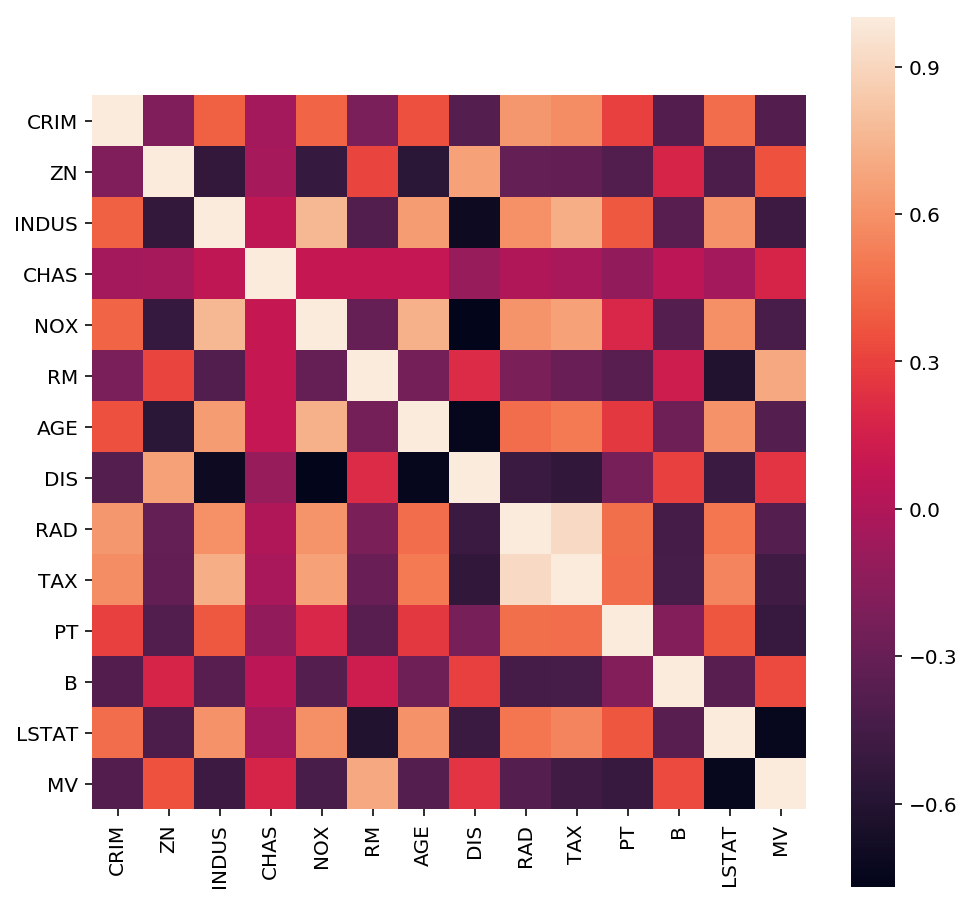

In [4]:
# This gives a "big picture" view of the relationships between the variables in the boston dataset

corrmat = boston.corr()
f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(corrmat, vmax=1, square=True);

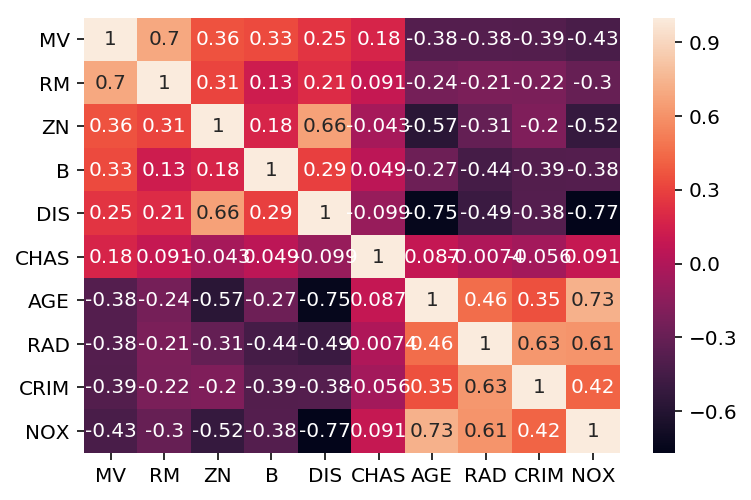

In [5]:
# We can see the coefficients of each variable which shows us their relationships to other variables
# We define "corrmat" in the previous step - without defining this we will get an error

v = 10
cols = corrmat.nlargest(v, 'MV')['MV'].index
cm = np.corrcoef(boston[cols].values.T)
hm = sns.heatmap(cm, cbar=True, annot=True, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

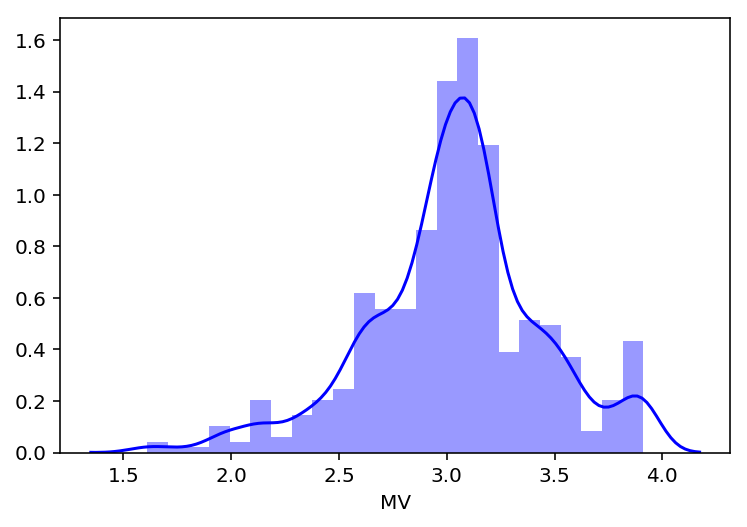

In [6]:
# we want to see the distribution of this data in order to see if we must adjust it in anyway 

sns.distplot(np.log(boston['MV']), color = 'b')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016D16E88198>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000016D17526390>]], dtype=object)

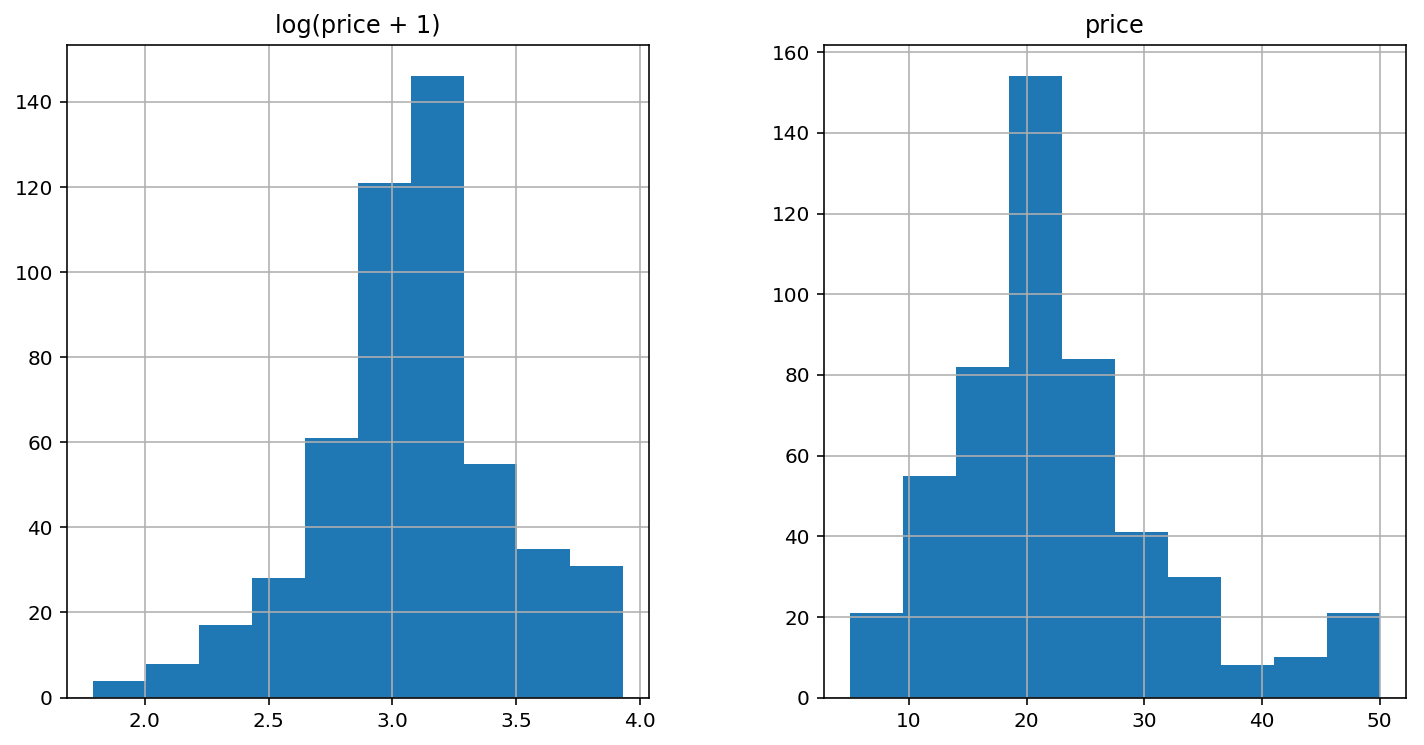

In [7]:
# We are going to take the log of this data so we can get in more normally distributed

matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
prices = pd.DataFrame({"price":boston["MV"], "log(price + 1)":np.log1p(boston["MV"])})
prices.hist()

This is where we can start our prediction, in a sense. We want split our dataset into two separate pieces. The "X" set will be where all our independent variables are. The "Y" set will be our dependent variable, which is the housing value.

Since we are not given a train and a test dataset we have to split it on our own. In this specific scenario, we want to train our model on 67% of the given data. You can test the shape variable after the split to see the proportion of columns to rows. 

In [8]:
# We split out independent variables up and our dependent variable 
# Y can also be defined as our target variable, or what we are trying to predict

X = boston.drop('MV', axis = 1)
Y = boston['MV']

In [9]:
# Here we want to split the data out so can train our model in the next couple of steps. We then will utilize the test data
# to determine our prediciton. We use an 80/20 split b/t train and test. This means that 80% of the data is being placed into
# the train set and 20% into the test set 

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=0)

In [10]:
# This depicts what is included in each X and y train/test set - we can see that the train sets hold more data
# We can see that the X variables include 13 columns, which are the independent variables
# The y variables only include the dependent variable, or in this case 'MV'

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404,), (102,))

In [11]:
# We are utilizing simple linear regression here so we import the sklearn linear regression model
from sklearn.linear_model import LinearRegression

# This fits the model to our training sets
lr = LinearRegression()
lr.fit(X_train, y_train)

# This will be our prediction
Y_Pred = lr.predict(X_test)

Text(0,0.5,'Predicted Prices')

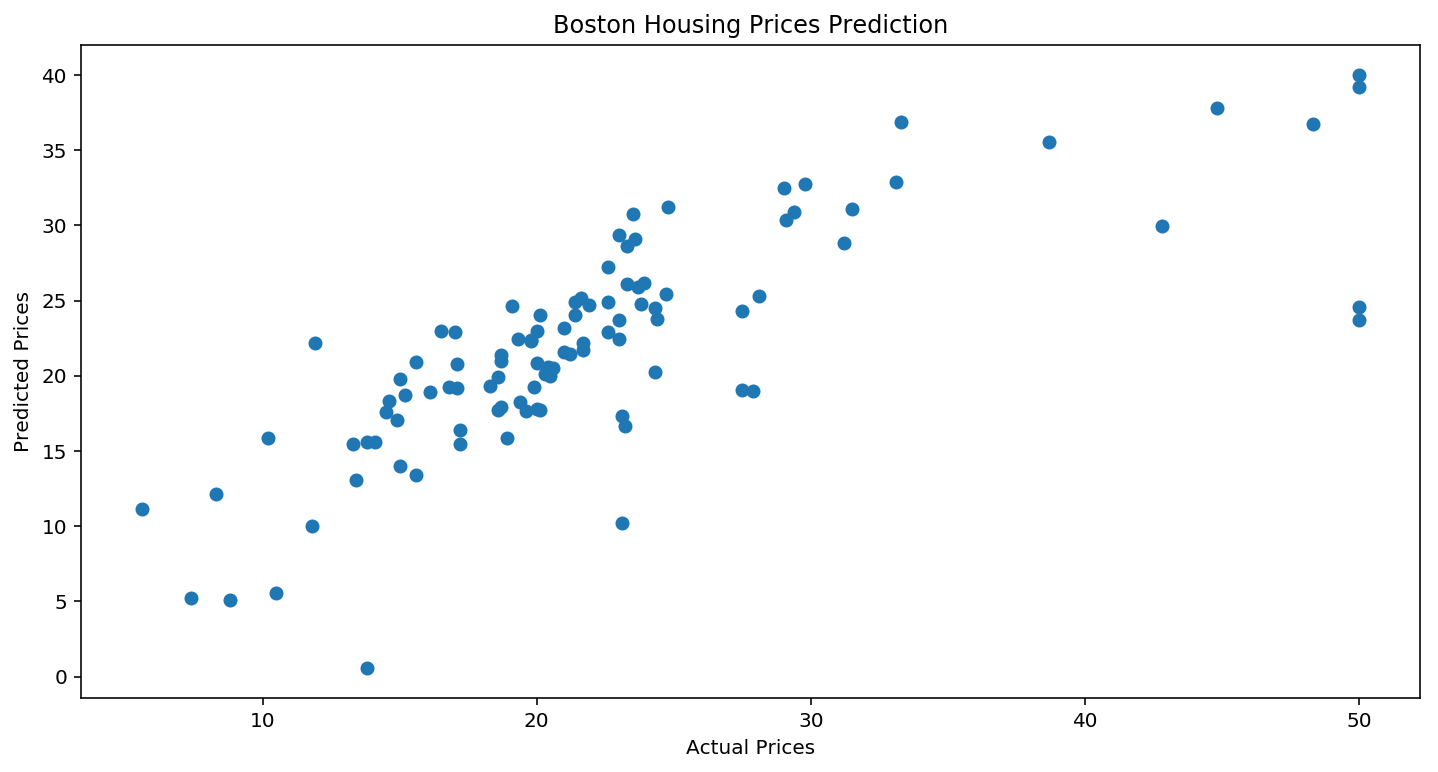

In [12]:
# We graph the 'MV' in the test set vs. our prediction
plt.scatter(y_test, Y_Pred)

# Labels of the scatter plot
plt.title('Boston Housing Prices Prediction')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')

In [13]:
# From a simple viewpoint we can see that our R^2 is 0.58. This shows us that there may be a better way to predict the housing 
# prices. Some of these techniques will be depicted in other notebooks.

r2 = r2_score(y_test, Y_Pred)
print(r2)

0.589222382773
